# Loading Data

GEO
Canada    456097.0
Name: VALUE, dtype: float64
GEO
Alberta             224481.0
British Columbia    163405.0
Saskatchewan         72531.0
Name: VALUE, dtype: float64
GEO
Canada    456097.0
Name: VALUE, dtype: float64


C:\Users\cathe\AppData\Local\Temp\ipykernel_2172\140674464.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  province_data = monthly_production.append(pd.Series({"Other": other_production}))


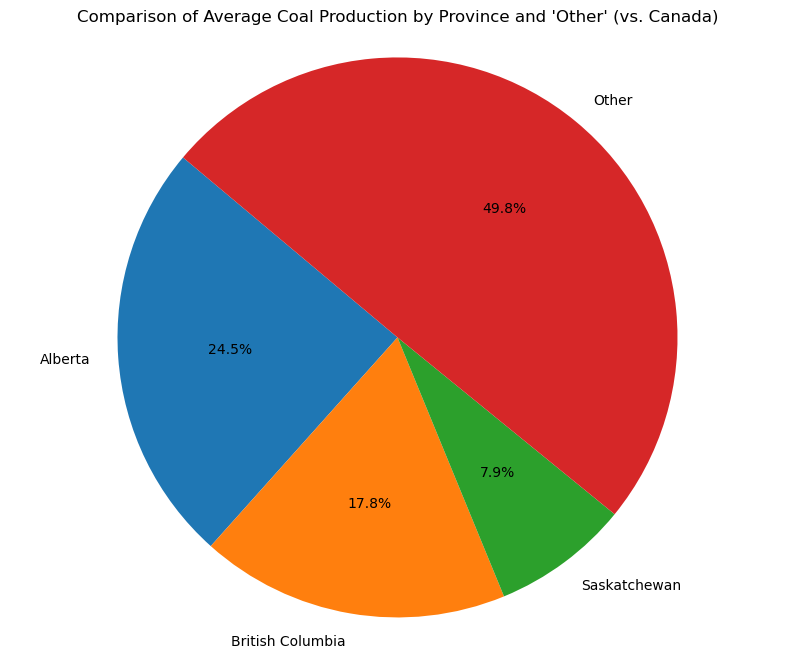

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Data/25100046-eng/25100046.csv")

production_data = data[(data['Coal types and uses'] == 'Total all coal types and uses') & (data["Coal volume"] == "Production")
                       & ~data["GEO"].isin(["Canada", "Nova Scotia", "New Brunswick"])]

monthly_production = production_data.groupby("GEO")["VALUE"].sum()
canada_data = data[(data['Coal types and uses'] == 'Total all coal types and uses') & (data["Coal volume"] == "Production")
                         & (data["GEO"] == "Canada")]
canada_production = canada_data.groupby("GEO")["VALUE"].sum()

other_production = canada_production
for province in monthly_production:
    other_production -= province

print(canada_production)
print(monthly_production)
print(other_production)
# Create a new DataFrame including "Other" category
province_data = monthly_production.append(pd.Series({"Other": other_production}))

# Create the pie chart for average production
plt.figure(figsize=(10, 8))
plt.pie(province_data, labels=province_data.index, autopct='%1.1f%%', startangle=140)
plt.title("Comparison of Average Coal Production by Province and 'Other' (vs. Canada)")
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coal_data = pd.read_csv('Data/25100046-eng/25100046.csv')
renewables_data = pd.read_csv('Data/25100082-eng/25100082.csv')

# Filtering data sets to plot only the total monthly production for Canada
coal_data['REF_DATE'] = pd.to_datetime(coal_data['REF_DATE'])
filtered_coal_production = coal_data[(coal_data['REF_DATE'] >= '2020-01-01') & (coal_data['GEO'] == 'Canada') &
                          (coal_data['Coal types and uses'] == 'Total all coal types and uses') & (coal_data['Coal volume'] == 'Production')]
filtered_coal_exports = coal_data[(coal_data['REF_DATE'] >= '2020-01-01') & (coal_data['GEO'] == 'Canada') &
                          (coal_data['Coal types and uses'] == 'Total all coal types and uses') & (coal_data['Coal volume'] == 'Exports')]

renewables_data['REF_DATE'] = pd.to_datetime(renewables_data['REF_DATE'])
filtered_renewables_production = renewables_data[(renewables_data['Supply and disposition'] == 'Production') & (renewables_data['Products'] == 'Renewable fuels, total')]
filtered_renewables_shipments = renewables_data[(renewables_data['Supply and disposition'] == 'Shipments') & (renewables_data['Products'] == 'Renewable fuels, total')]


#plt.figure(figsize=(10, 6))
#plt.plot(filtered_coal_production['REF_DATE'], filtered_coal_production['VALUE']*1000, color = 'black')
#plt.plot(filtered_renewables_production['REF_DATE'], filtered_renewables_production['VALUE']*1.133)
#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.title('Data for Canada from 2020 Onward')
#plt.show()